# MMDeploy本地部署预测-单张图像



## 本代码需在终端本地运行

## 导入工具包

In [1]:
import cv2
import numpy as np
import time
from tqdm import tqdm

from mmdeploy_runtime import Detector
from mmdeploy_runtime import PoseDetector

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## 载入图像

In [3]:
img_path = 'mmpose/data/test_face/13008107_0.jpg'

In [4]:
img_bgr = cv2.imread(img_path)

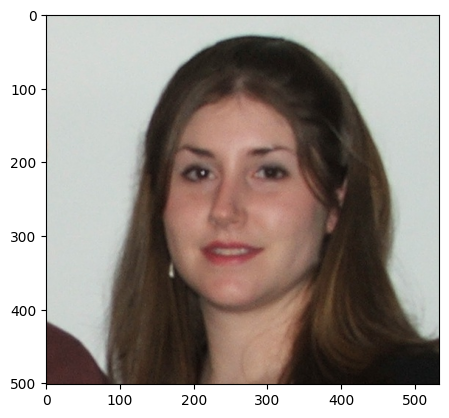

In [5]:
plt.imshow(img_bgr[:,:,::-1])

## 载入模型

In [6]:
# 目标检测模型目录
detect = 'yolo2onnx'

# 关键点检测模型目录
pose = 'rtmpose2onnx'

# 计算设备
# device = 'cpu'
device = 'cuda'

bbox_detector = Detector(detect, device)
pose_detector = PoseDetector(pose, device)

## 可视化配置

In [7]:
# 框（face）可视化配置
bbox_label = 'face'              # 框的类别名称
bbox_color = (255, 129, 0)           # 框的 BGR 颜色
bbox_thickness = 5                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':6,         # 字体大小
    'font_thickness':10,    # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

# 关键点 BGR 配色
kpt_color_map = {
    0:{'name': 'face_0', 'color': [255, 0, 0], 'radius': 15},
    1:{'name': 'face_1', 'color': [255, 0, 0], 'radius': 15},
    2:{'name': 'face_2', 'color': [255, 0, 0], 'radius': 15},
    3:{'name': 'face_3', 'color': [255, 0, 0], 'radius': 15},
    4:{'name': 'face_4', 'color': [255, 0, 0], 'radius': 15},
    5:{'name': 'face_5', 'color': [255, 0, 0], 'radius': 15},
    6:{'name': 'face_6', 'color': [255, 0, 0], 'radius': 15},
    7:{'name': 'face_7', 'color': [255, 0, 0], 'radius': 15},
    8:{'name': 'face_8', 'color': [255, 0, 0], 'radius': 15},
    9:{'name': 'face_9', 'color': [255, 0, 0], 'radius': 15},
    10:{'name': 'face_10', 'color': [255, 0, 0], 'radius': 15},
    11:{'name': 'face_11', 'color': [255, 0, 0], 'radius': 15},
    12:{'name': 'face_12', 'color': [255, 0, 0], 'radius': 15},
    13:{'name': 'face_13', 'color': [255, 0, 0], 'radius': 15},
    14:{'name': 'face_14', 'color': [255, 0, 0], 'radius': 15},
    15:{'name': 'face_15', 'color': [255, 0, 0], 'radius': 15},
    16:{'name': 'face_16', 'color': [255, 0, 0], 'radius': 15},
    17:{'name': 'face_17', 'color': [255, 0, 0], 'radius': 15},
    18:{'name': 'face_18', 'color': [255, 0, 0], 'radius': 15},
    19:{'name': 'face_19', 'color': [255, 0, 0], 'radius': 15},
    20:{'name': 'face_20', 'color': [255, 0, 0], 'radius': 15},
    21:{'name': 'face_21', 'color': [255, 0, 0], 'radius': 15},
    22:{'name': 'face_22', 'color': [255, 0, 0], 'radius': 15},
    23:{'name': 'face_23', 'color': [255, 0, 0], 'radius': 15},
    24:{'name': 'face_24', 'color': [255, 0, 0], 'radius': 15},
    25:{'name': 'face_25', 'color': [255, 0, 0], 'radius': 15},
    26:{'name': 'face_26', 'color': [255, 0, 0], 'radius': 15},
    27:{'name': 'face_27', 'color': [255, 0, 0], 'radius': 15},
    28:{'name': 'face_28', 'color': [255, 0, 0], 'radius': 15},
    29:{'name': 'face_29', 'color': [255, 0, 0], 'radius': 15},
    30:{'name': 'face_30', 'color': [255, 0, 0], 'radius': 15},
    31:{'name': 'face_31', 'color': [255, 0, 0], 'radius': 15},
    32:{'name': 'face_32', 'color': [255, 0, 0], 'radius': 15},
    33:{'name': 'face_33', 'color': [255, 0, 0], 'radius': 15},
    34:{'name': 'face_34', 'color': [255, 0, 0], 'radius': 15},
    35:{'name': 'face_35', 'color': [255, 0, 0], 'radius': 15},
    36:{'name': 'face_36', 'color': [255, 0, 0], 'radius': 15},
    37:{'name': 'face_37', 'color': [255, 0, 0], 'radius': 15},
    38:{'name': 'face_38', 'color': [255, 0, 0], 'radius': 15},
    39:{'name': 'face_39', 'color': [255, 0, 0], 'radius': 15},
    40:{'name': 'face_40', 'color': [255, 0, 0], 'radius': 15},
    41:{'name': 'face_41', 'color': [255, 0, 0], 'radius': 15},
    42:{'name': 'face_42', 'color': [255, 0, 0], 'radius': 15},
    43:{'name': 'face_43', 'color': [255, 0, 0], 'radius': 15},
    44:{'name': 'face_44', 'color': [255, 0, 0], 'radius': 15},
    45:{'name': 'face_45', 'color': [255, 0, 0], 'radius': 15},
    46:{'name': 'face_46', 'color': [255, 0, 0], 'radius': 15},
    47:{'name': 'face_47', 'color': [255, 0, 0], 'radius': 15},
    48:{'name': 'face_48', 'color': [255, 0, 0], 'radius': 15},
    49:{'name': 'face_49', 'color': [255, 0, 0], 'radius': 15},
    50:{'name': 'face_50', 'color': [255, 0, 0], 'radius': 15},
    51:{'name': 'face_51', 'color': [255, 0, 0], 'radius': 15},
    52:{'name': 'face_52', 'color': [255, 0, 0], 'radius': 15},
    53:{'name': 'face_53', 'color': [255, 0, 0], 'radius': 15},
    54:{'name': 'face_54', 'color': [255, 0, 0], 'radius': 15},
    55:{'name': 'face_55', 'color': [255, 0, 0], 'radius': 15},
    56:{'name': 'face_56', 'color': [255, 0, 0], 'radius': 15},
    57:{'name': 'face_57', 'color': [255, 0, 0], 'radius': 15},
    58:{'name': 'face_58', 'color': [255, 0, 0], 'radius': 15},
    59:{'name': 'face_59', 'color': [255, 0, 0], 'radius': 15},
    60:{'name': 'face_60', 'color': [255, 0, 0], 'radius': 15},
    61:{'name': 'face_61', 'color': [255, 0, 0], 'radius': 15},
    62:{'name': 'face_62', 'color': [255, 0, 0], 'radius': 15},
    63:{'name': 'face_63', 'color': [255, 0, 0], 'radius': 15},
    64:{'name': 'face_64', 'color': [255, 0, 0], 'radius': 15},
    65:{'name': 'face_65', 'color': [255, 0, 0], 'radius': 15},
    66:{'name': 'face_66', 'color': [255, 0, 0], 'radius': 15},
    67:{'name': 'face_67', 'color': [255, 0, 0], 'radius': 15},
    68:{'name': 'face_68', 'color': [255, 0, 0], 'radius': 15},
    69:{'name': 'face_69', 'color': [255, 0, 0], 'radius': 15},
    70:{'name': 'face_70', 'color': [255, 0, 0], 'radius': 15},
    71:{'name': 'face_71', 'color': [255, 0, 0], 'radius': 15},
    72:{'name': 'face_72', 'color': [255, 0, 0], 'radius': 15},
    73:{'name': 'face_73', 'color': [255, 0, 0], 'radius': 15},
    74:{'name': 'face_74', 'color': [255, 0, 0], 'radius': 15},
    75:{'name': 'face_75', 'color': [255, 0, 0], 'radius': 15},
    76:{'name': 'face_76', 'color': [255, 0, 0], 'radius': 15},
    77:{'name': 'face_77', 'color': [255, 0, 0], 'radius': 15},
    78:{'name': 'face_78', 'color': [255, 0, 0], 'radius': 15},
    79:{'name': 'face_79', 'color': [255, 0, 0], 'radius': 15},
    80:{'name': 'face_80', 'color': [255, 0, 0], 'radius': 15},
    81:{'name': 'face_81', 'color': [255, 0, 0], 'radius': 15},
    82:{'name': 'face_82', 'color': [255, 0, 0], 'radius': 15},
    83:{'name': 'face_83', 'color': [255, 0, 0], 'radius': 15},
    84:{'name': 'face_84', 'color': [255, 0, 0], 'radius': 15},
    85:{'name': 'face_85', 'color': [255, 0, 0], 'radius': 15},
    86:{'name': 'face_86', 'color': [255, 0, 0], 'radius': 15},
    87:{'name': 'face_87', 'color': [255, 0, 0], 'radius': 15},
    88:{'name': 'face_88', 'color': [255, 0, 0], 'radius': 15},
    89:{'name': 'face_89', 'color': [255, 0, 0], 'radius': 15},
    90:{'name': 'face_90', 'color': [255, 0, 0], 'radius': 15},
    91:{'name': 'face_91', 'color': [255, 0, 0], 'radius': 15},
    92:{'name': 'face_92', 'color': [255, 0, 0], 'radius': 15},
    93:{'name': 'face_93', 'color': [255, 0, 0], 'radius': 15},
    94:{'name': 'face_94', 'color': [255, 0, 0], 'radius': 15},
    95:{'name': 'face_95', 'color': [255, 0, 0], 'radius': 15},
    96:{'name': 'face_96', 'color': [255, 0, 0], 'radius': 15},
    97:{'name': 'face_97', 'color': [255, 0, 0], 'radius': 15},
    98:{'name': 'face_98', 'color': [255, 0, 0], 'radius': 15},
    99:{'name': 'face_99', 'color': [255, 0, 0], 'radius': 15},
    100:{'name': 'face_100', 'color': [255, 0, 0], 'radius': 15},
    101:{'name': 'face_101', 'color': [255, 0, 0], 'radius': 15},
    102:{'name': 'face_102', 'color': [255, 0, 0], 'radius': 15},
    103:{'name': 'face_103', 'color': [255, 0, 0], 'radius': 15},
    104:{'name': 'face_104', 'color': [255, 0, 0], 'radius': 15},
    105:{'name': 'face_105', 'color': [255, 0, 0], 'radius': 15},
}

# 关键点类别文字
kpt_labelstr = {
    'font_size':8,             # 字体大小
    'font_thickness':14,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':50,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':8},        
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':8},        
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':8},         
]

## 目标检测推理预测

In [ ]:
# 目标检测推理预测
bboxes, labels, masks = bbox_detector(img_bgr)

# 置信度阈值过滤
bboxes = bboxes[bboxes[:, -1] > 0.55]

# 获取整数坐标
bboxes = bboxes[:, :4].astype(np.int32)

In [ ]:
bboxes

## 关键点检测推理预测

In [ ]:
keypoints = pose_detector(img_bgr, bboxes)[:,:,:2].astype(np.int32)

In [ ]:
# n_box x n_key_point x 2
keypoints

## OpenCV可视化

In [ ]:
num_bbox = len(bboxes)

for idx in range(num_bbox): # 遍历每个框

    # 获取该框坐标
    bbox_xyxy = bboxes[idx] 

    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

    bbox_keypoints = keypoints[idx] # 该框所有关键点坐标和置信度

    # 画该框的骨架连接
    for skeleton in skeleton_map:

        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

        # 获取骨架连接颜色
        skeleton_color = skeleton['color']

        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']

        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)  

    # 画该框的关键点
    for kpt_id in kpt_color_map:

        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]

        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        kpt_label = str(kpt_id) # 写关键点类别 ID（二选一）
        # kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称（二选一）
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

In [ ]:
cv2.imwrite('output_H4.jpg', img_bgr)